<a href="https://colab.research.google.com/github/Jastej786/Finsearch_24/blob/main/Prices_of_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
from google.colab import  drive
import yfinance as yf
drive.mount('/drive')

Mounted at /drive


In [2]:
#function that saves data collected from yahoo finance to csv format
def save_to_csv_from_yahoo(ticker,syear, smonth, sday, eyear,emonth,eday):
  start = dt.datetime(syear,smonth,sday)
  end = dt.datetime(eyear,emonth,eday)

  df = yf.download(ticker,start,end)
  df.to_csv('/content/drive/MyDrive/Colab_Notebooks/Finsearch_24/data/'+ticker+'.csv')
  return df

In [12]:
#we start fetching data of 9 stocks and also take gold data from a csv file saved in data file
save_to_csv_from_yahoo('RELIANCE.NS', 2007,12,1,2009,6,1 )
save_to_csv_from_yahoo('TATASTEEL.NS', 2007,12,1,2009,6,1 )
save_to_csv_from_yahoo('ONGC.NS', 2007,12,1,2009,6,1 )
save_to_csv_from_yahoo('HDFCBANK.NS', 2007,12,1,2009,6,1 )
save_to_csv_from_yahoo('INFY.NS', 2007,12,1,2009,6,1 )
save_to_csv_from_yahoo('HINDUNILVR.NS', 2007,12,1,2009,6,1 )
save_to_csv_from_yahoo('LT.NS', 2007,12,1,2009,6,1 )
save_to_csv_from_yahoo('GLAXO.NS', 2007,12,1,2009,6,1 )
save_to_csv_from_yahoo('^NSEI', 2007,12,1,2009,6,1 )

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-03,5765.450195,5878.799805,5754.600098,5865.000000,5865.000000,0
2007-12-04,5870.200195,5897.250000,5840.299805,5858.350098,5858.350098,0
2007-12-05,5861.899902,5949.299805,5859.950195,5940.000000,5940.000000,0
2007-12-06,5941.049805,6027.049805,5919.799805,5954.700195,5954.700195,0
2007-12-07,5963.600098,6042.100098,5894.799805,5974.299805,5974.299805,0
...,...,...,...,...,...,...
2009-05-25,4238.100098,4270.049805,4205.100098,4237.549805,4237.549805,0
2009-05-26,4239.549805,4256.049805,4092.250000,4116.700195,4116.700195,0
2009-05-27,4117.299805,4286.450195,4115.250000,4276.049805,4276.049805,0


In [14]:
tickers = ['RELIANCE.NS','TATASTEEL.NS','ONGC.NS','HDFCBANK.NS','INFY.NS','HINDUNILVR.NS','LT.NS','GLAXO.NS','^NSEI']

In [15]:
#we define a function to make a data frame with adjusted close prices of 9 stocks
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()

    start = dt.datetime(syear,smonth,sday)
    end = dt.datetime(eyear,emonth,eday)

    for x in tickers:
        mult_df[x] = yf.download(x, start, end)[col_name]

    return mult_df

In [50]:
mult_df = merge_df_by_column_name('Adj Close',2007,12,1,2009,6,1,*tickers)
mult_df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,RELIANCE.NS,TATASTEEL.NS,ONGC.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,LT.NS,GLAXO.NS,^NSEI
Date,,,,,,,,,
2007-12-03,591.893433,24.097281,96.936813,149.253571,141.476303,150.940094,743.143982,344.716797,5865.000000
2007-12-04,577.292236,24.967093,95.905579,149.741928,142.797913,151.306381,753.004333,341.568420,5858.350098
2007-12-05,585.137390,24.763943,99.955994,151.691116,141.754776,150.903442,768.270874,349.034454,5940.000000
2007-12-06,579.571228,24.267527,99.115250,148.712387,144.570435,152.112152,765.132202,348.261017,5954.700195
2007-12-07,573.047058,23.806868,98.705261,151.339127,152.257080,152.808060,758.401428,348.152985,5974.299805


In [51]:
#we now make a function showing stock prices over the recession period for the taken 9 stocks
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

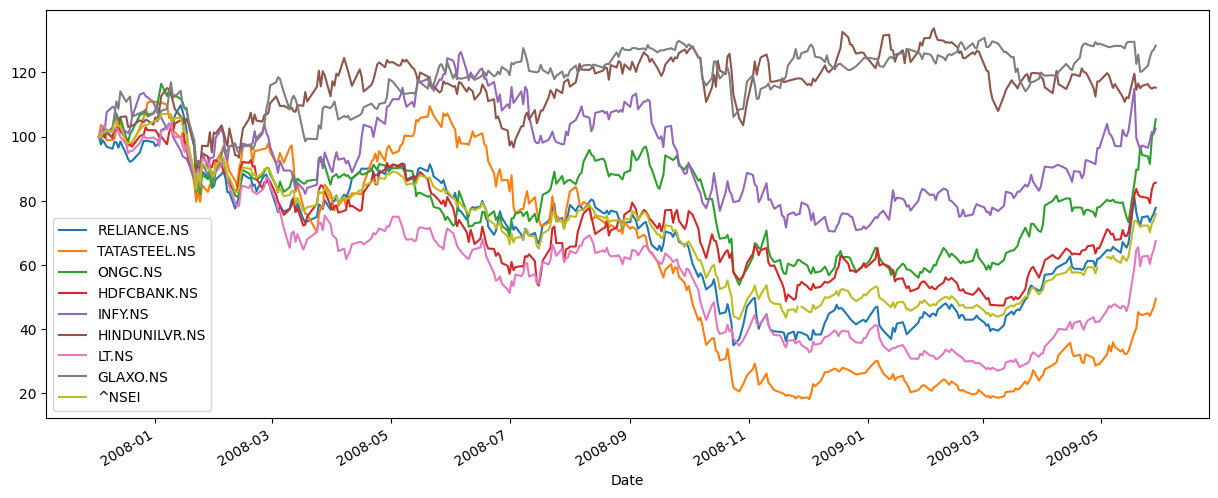

In [52]:
plot_return_mult_stocks(100, mult_df)

In [34]:
gold_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Finsearch_24/data/gold_prices.csv')
gold_df.head()

,Date,Price
0,03/12/07,30973.95
1,04/12/07,31433.46
2,05/12/07,31312.64
3,06/12/07,31647.23
4,07/12/07,31228.46


In [35]:
gold_df = gold_df.set_index(pd.DatetimeIndex(gold_df['Date'].values))
gold_df.head()

,Date,Price
2007-03-12,03/12/07,30973.95
2007-04-12,04/12/07,31433.46
2007-05-12,05/12/07,31312.64
2007-06-12,06/12/07,31647.23
2007-07-12,07/12/07,31228.46


In [36]:
gold_df = gold_df.drop(['Date'], axis = 1)
gold_df.head()

,Price
2007-03-12,30973.95
2007-04-12,31433.46
2007-05-12,31312.64
2007-06-12,31647.23
2007-07-12,31228.46


change index of prices to integer values

In [37]:
gold_df['Price'] = gold_df['Price'].astype(float)

In [46]:
#rename price column to Gold_Price
gold_df = gold_df.rename(columns = {'Price':'Gold_Price'})
gold_df.head()

,Gold_Price
2007-03-12,30973.95
2007-04-12,31433.46
2007-05-12,31312.64
2007-06-12,31647.23
2007-07-12,31228.46


In [47]:
gold_df.tail()

,Gold_Price
2009-05-26,45270.23
2009-05-27,45357.95
2009-05-28,45593.69
2009-05-29,45960.68
2009-01-06,46107.89


In [53]:
mult_df = mult_df.merge(gold_df, how = 'inner', left_index = True, right_index = True)

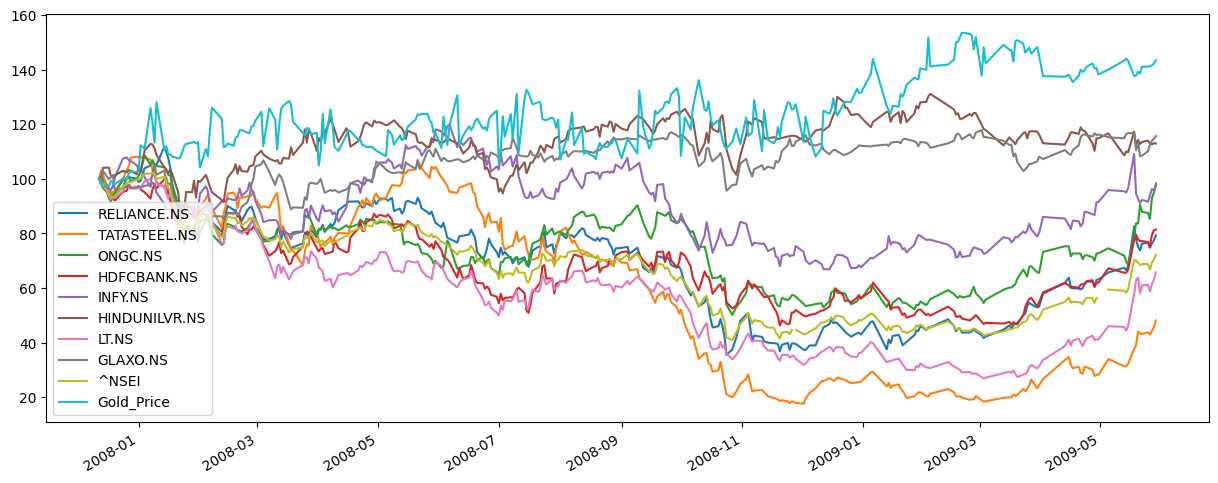

In [54]:
plot_return_mult_stocks(100, mult_df)